Import packacges.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale
%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('./final_result_impl_normals_2.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

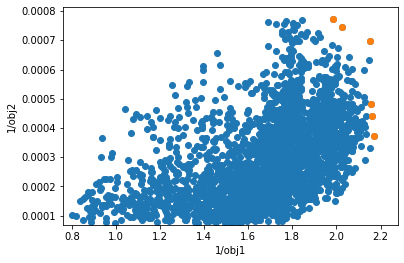

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0007199424046076181


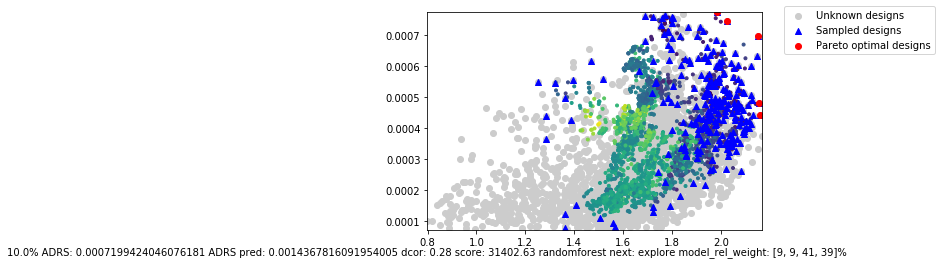

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.1),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([ 763,  765,  766, 1811,  760,  104, 2417, 1720, 1824, 1834,  548,
        515, 1197,  549, 1198, 1229,  550, 2307, 1228,  681,  555, 1353,
        813,  648, 1735, 2005, 2050, 1352, 1741, 1736, 1819, 1755,  682,
       1818, 2006, 1497, 2168, 1251, 1496, 2167, 2205, 1737, 1738, 2008,
       1200, 1199, 2007, 2169, 1820, 2170, 2309, 1204, 1211,  683, 1206,
       1073, 2147, 2204, 2127,  551, 1230, 1359, 2191, 2181, 2133, 1165,
       2217, 1890, 2084,  940,  556, 2196, 2172, 1986, 1700, 2033, 2302,
       2311,  481,  684,  614, 1131, 1987, 2148, 1132, 1097, 1701,  141,
        140,  209,  142,  210,  143,    0,  105,    1,    2,   36,  482,
       1134, 1133, 1988, 1702,  212,  211,    3,  106,  483,  484, 2149,
        278,  280,  348, 1989,  108, 2192,  279, 2150, 2291,  281,    7,
        147,  148,  107, 1138,    8, 1139, 1290, 1784, 1788, 1707,  488,
        216, 1288, 1703, 1289,   10,  149,  145, 2131,    4,  615,  144,
          5,  150, 1739, 1135,  282,  449,  213,  1